# Train $m_{hh}$ cut

**Goal:** When I was futzing around in the `First-Bkg-Estimate` nb, we did learn that cutting at $m_{hh}$ = 350 GeV *didn't* really seem to cause a huge impact on the systematic only limit, but Sean said it really was important that I retrain with

Of particular importance, we're sort of trying to see if the $m_{hh}$ variables below 350 GeV are *pulling* the rest of the systematic, so this is sort of what we're trying to dive into with this study.

This was my first time running the reweighting w/ Sean's code, so I didn't quite get all the pieces working, so for example, I'm going to be looking at the samples *before* the normlization gets calculated, since I sort of wanted to investigate the impact of this cut.

In [4]:
import pandas as pd
import numpy as np
from itertools import product
from glob import glob
import uproot
import pyhf

import os
os.sys.path += ['../RRevolution/code','../code', "../eda_tools/", "../PyATLASstyle/"]
from analysis import getXhh
from utils import L
from eventDisplays import rainbow_text
from utilities import weighted_chisquare

import matplotlib.pyplot as plt
from matplotlib import gridspec

import logging   
for name in logging.Logger.manager.loggerDict.keys():
    logging.getLogger(name).setLevel(logging.CRITICAL)
        
plt.rcParams.update({'figure.max_open_warning': 0})

# Let's do ATLAS style plots too!
import matplotlib as mpl
import PyATLASstyle as pas
pas.applyATLASstyle(mpl)

/gpfs/slac/atlas/fs1/d/rafaeltl/public/conda/miniconda3/envs/py3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.neighbors.unsupervised module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/gpfs/slac/atlas/fs1/d/rafaeltl/public/conda/miniconda3/envs/py3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.tree.tree module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.tree. Anything that cannot be imported from sklearn.tree is now part of the private API.
  warnings.warn(message, FutureWarning)
../PyATLASstyle/PyATLASstyle.py:12: MatplotlibDeprecationWarning: 
The createFontList

In [5]:
yr = 17

Load in some of the input datasets.

**Signal**

In [6]:
x1,y1 = 124,117

In [7]:
sFile = '../data/RR/NNT_DEC20_MDR_VEC/MC/600043_mc16{}/NanoNTuple.root'

tName = 'fullmassplane'
scols=['m_hh','ntag','m_h1','m_h2','pass_vbf_sel','mc_sf','truth_mhh']

sdf = uproot.open(sFile.format('d'))[tName].pandas.df(scols)

# Apply the lumi scaling - and calculate the *new* SR / cut the unwanted events
sdf['mc_sf']     *= L[yr]
sdf['truth_mhh'] *= 0.001

sdf['Xhh_new'] = getXhh(*sdf[['m_h1','m_h2']].values.T,x1,y1)

sdf = sdf[(sdf.Xhh_new < 1.6) & (sdf.ntag>=4) & (~sdf.pass_vbf_sel)]

**Background**

In [8]:
fDir = '/u/ki/nhartman/gpfs/diHiggs4b/data/RR/nom_trigs_unblind'

In [9]:
f = uproot.open(f'{fDir}/ntag_4b/data17_min_dR_VEC_sr_124_117_NN_100_bootstraps.root') 
f_gt = uproot.open(f'{fDir}/data17_min_dR_VEC_sr_124_117_NN_100_bootstraps_m_hh_gt_350.root') 
f_lt = uproot.open(f'{fDir}/data17_min_dR_VEC_sr_124_117_NN_100_bootstraps_m_hh_lt_350.root')

In [10]:
f_lt.keys()

[b'sig;1',
 b'control;1',
 b'validation;1',
 b'NN_norm_bstrap_med_17;1',
 b'NN_norm_bstrap_IQR_17;1',
 b'NN_norm_bstrap_perc_25_17;1',
 b'NN_norm_bstrap_perc_75_17;1',
 b'NN_norm_VRderiv_bstrap_med_17;1',
 b'NN_norm_VRderiv_bstrap_IQR_17;1',
 b'NN_norm_VRderiv_bstrap_perc_25_17;1',
 b'NN_norm_VRderiv_bstrap_perc_75_17;1']

In [11]:
for b in f['sig'].keys():
    print(b)

b'run_number'
b'event_number'
b'pass_vbf_sel'
b'mc_sf'
b'trig_sf'
b'jet_trig_sfs'
b'truth_mhh'
b'ntag'
b'njets'
b'kinematic_region'
b'm_min_dj'
b'm_max_dj'
b'pairing_score_1'
b'pairing_score_2'
b'bkt_lead_jet_pt'
b'bkt_lead_jet_tag'
b'bkt_HT'
b'bucket_passed'
b'cos_theta_star'
b'm_hh_cor'
b'm_hh'
b'pt_hh'
b'dEta_hh'
b'X_wt_tag'
b'X_wt_notag'
b'X_wt_nonHCWjets'
b'trig_bucket'
b'm_h1'
b'E_h1'
b'pT_h1'
b'eta_h1'
b'phi_h1'
b'm_h2'
b'E_h2'
b'pT_h2'
b'eta_h2'
b'phi_h2'
b'm_h1_j1'
b'E_h1_j1'
b'pT_h1_j1'
b'eta_h1_j1'
b'phi_h1_j1'
b'tag_h1_j1'
b'quantile_h1_j1'
b'angle_h1_j1'
b'm_h1_j2'
b'E_h1_j2'
b'pT_h1_j2'
b'eta_h1_j2'
b'phi_h1_j2'
b'tag_h1_j2'
b'quantile_h1_j2'
b'angle_h1_j2'
b'm_h2_j1'
b'E_h2_j1'
b'pT_h2_j1'
b'eta_h2_j1'
b'phi_h2_j1'
b'tag_h2_j1'
b'quantile_h2_j1'
b'angle_h2_j1'
b'm_h2_j2'
b'E_h2_j2'
b'pT_h2_j2'
b'eta_h2_j2'
b'phi_h2_j2'
b'tag_h2_j2'
b'quantile_h2_j2'
b'angle_h2_j2'
b'pT_4'
b'pT_2'
b'eta_i'
b'dRjj_1'
b'dRjj_2'
b'm_vbf_j1'
b'E_vbf_j1'
b'pT_vbf_j1'
b'eta_vbf_j1'
b'phi_vbf_j1

**To do: Sanity check these all have the ~pass_vbf_sel string applied.**

In [12]:
short_cols = ['run_number','event_number', f'NN_d24_weight_bstrap_med_{yr}',
              f'NN_d24_weight_VRderiv_bstrap_med_{yr}']

cols = short_cols + ['pass_vbf_sel','m_hh','ntag']


In [13]:
sr    = f['sig'].pandas.df(cols)
sr_gt = f_gt['sig'].pandas.df(short_cols)
sr_lt = f_lt['sig'].pandas.df(short_cols)

vr    = f['validation'].pandas.df(cols)
vr_gt = f_gt['validation'].pandas.df(short_cols)
vr_lt = f_lt['validation'].pandas.df(short_cols)

cr    = f['control'].pandas.df(cols)
cr_gt = f_gt['control'].pandas.df(short_cols)
cr_lt = f_lt['control'].pandas.df(short_cols)


In [14]:
# Add a few assertion statements to make sure these cols are aligned

for sri in [sr_gt,sr_lt]:
    
    assert np.sum(sr.event_number != sri.event_number) == 0
    assert np.sum(sr.run_number != sri.run_number) == 0

**Step 1:** Compare the *norms* from the small correction that's getting applied after the reweighting.

In [15]:
norm_nom = f['NN_norm_bstrap_med_17']._fVal

norm_gt = np.sum((cr.ntag >=4) & (cr.m_hh > 350))/ \
            np.sum(cr_gt.loc[(cr.ntag ==2) & (cr.m_hh > 350),f'NN_d24_weight_bstrap_med_{yr}'])

norm_lt = np.sum((cr.ntag >=4) & (cr.m_hh < 350))/ \
            np.sum(cr_lt.loc[(cr.ntag ==2) & (cr.m_hh < 350),f'NN_d24_weight_bstrap_med_{yr}'])


n_vr_nom = f['NN_norm_VRderiv_bstrap_med_17']._fVal

n_vr_gt = np.sum((vr.ntag >=4) & (vr.m_hh > 350))/ \
            np.sum(vr_gt.loc[(vr.ntag ==2) & (vr.m_hh > 350),f'NN_d24_weight_VRderiv_bstrap_med_{yr}'])

n_vr_lt = np.sum((vr.ntag >=4) & (vr.m_hh < 350))/ \
            np.sum(vr_lt.loc[(vr.ntag ==2) & (vr.m_hh < 350),f'NN_d24_weight_VRderiv_bstrap_med_{yr}'])


In [16]:
norm_nom,norm_gt,norm_lt

(1.0519554846319217, 1.0519407286757572, 1.0883473934481995)

In [17]:
n_vr_nom,n_vr_gt,n_vr_lt

(1.0579983602821355, 1.0613794088491357, 1.0793471756681838)

**Major warning:** Why is 74% so low?

Probably b/c lower stats, I should put an error bar from the bootstraps on this!!

In [19]:
f.keys()

[b'validation;1',
 b'sig;1',
 b'control;1',
 b'NN_norm_bstrap_med_17;1',
 b'NN_norm_bstrap_IQR_17;1',
 b'NN_norm_bstrap_perc_25_17;1',
 b'NN_norm_bstrap_perc_75_17;1',
 b'NN_norm_VRderiv_bstrap_med_17;1',
 b'NN_norm_VRderiv_bstrap_IQR_17;1',
 b'NN_norm_VRderiv_bstrap_perc_25_17;1',
 b'NN_norm_VRderiv_bstrap_perc_75_17;1']

In [20]:
f['NN_norm_bstrap_perc_25_17']._fVal,f['NN_norm_bstrap_perc_75_17']._fVal

(0.9207226130202064, 0.9962109337465441)

In [21]:
f['NN_norm_bstrap_perc_75_17']._fVal - f['NN_norm_bstrap_perc_25_17']._fVal

0.07548832072633771

In [22]:
f['NN_norm_bstrap_IQR_17']._fVal

0.07548832072633771

In [23]:
f_gt['NN_norm_bstrap_IQR_17']._fVal,f_lt['NN_norm_bstrap_IQR_17']._fVal

(0.08060497346548923, 0.079853029888595)

In [24]:
figDir = f'figures/data{yr}-JUN20/m_hh_350_trainings'

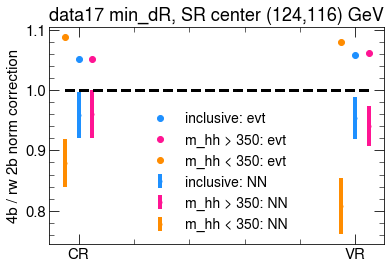

In [25]:
eps = .05

xx = np.arange(2)

for fi,c,ei,l in zip([f,f_gt,f_lt], ['dodgerblue','deeppink','darkorange'],
                     [0,eps,-eps], ['inclusive','m_hh > 350','m_hh < 350']):
    
    yy = np.array([fi[f'NN_norm_bstrap_med_{yr}']._fVal, fi[f'NN_norm_VRderiv_bstrap_med_{yr}']._fVal])
    plt.plot(xx+ei, yy, marker='o',color=c,label=f'{l}: evt',lw=0)
    
    ymid = [0.5 * (fi[f'NN_norm{t}_bstrap_perc_75_17']._fVal + fi[f'NN_norm{t}_bstrap_perc_25_17']._fVal)
            for t in ['','_VRderiv']]
    yerr = 0.5 * np.array([fi[f'NN_norm_bstrap_IQR_{yr}']._fVal, fi[f'NN_norm_VRderiv_bstrap_IQR_{yr}']._fVal])
    
    y_up = np.array([fi[f'NN_norm_bstrap_perc_75_{yr}']._fVal, fi[f'NN_norm_VRderiv_bstrap_perc_75_{yr}']._fVal])
    y_dn = np.array([fi[f'NN_norm_bstrap_perc_25_{yr}']._fVal, fi[f'NN_norm_VRderiv_bstrap_perc_25_{yr}']._fVal])

    plt.errorbar(xx+ei, ymid, yerr, marker='.',color=c,label=f'{l}: NN',lw=0,elinewidth=4)

plt.plot([-eps,1+eps],[1]*2,'k--')
plt.xticks([0,1],['CR','VR'])
plt.ylabel('4b / rw 2b norm correction')
plt.title(f'data{yr} min_dR, SR center (124,116) GeV')
plt.legend()
plt.savefig(f'{figDir}/normComparisons.pdf',bbox_inches='tight')

^ Note, it would also be interesting to see how the norm from one training was applicable to the norm from another training.

**Plan:** I can make a slew of plots, but I'm going to *start out* just investigating what the $m_{hh}$ systematic looks like!!

A.k.a, for starters, I can look @ the signal??

In [26]:
n,r = 40,(200,1200)

In [27]:
for sri,c,norm,norm_vr,l in zip([sr,sr_gt,sr_lt],['dodgerblue','deeppink','darkorange'],
                                [norm_nom,norm_gt,norm_lt],
                                [n_vr_nom,n_vr_gt,n_vr_lt],
                                ['inclusive','m_hh > 350','m_hh < 350']):

    nom,e = np.histogram(sr.loc[sr.ntag==2,'m_hh'],n,r,
                         weights=norm*sri.loc[sr.ntag==2,f'NN_d24_weight_bstrap_med_{yr}'])
    var,_ = np.histogram(sr.loc[sr.ntag==2,'m_hh'],n,r,
                         weights=norm_vr*sri.loc[sr.ntag==2,f'NN_d24_weight_VRderiv_bstrap_med_{yr}'])
    
    print(np.sum(nom),np.sum(var))
    
    xx = 0.5 * (e[1:]+e[:-1])
    
    plt.plot(xx, var/nom, color=c,label=l  )
    
    plt.plot(xx, 2-var/nom, color=c,ls='--'  )
    
plt.plot(xx,np.ones_like(xx),'k--')
plt.plot([350]*2,[0,2],'k--')
plt.xlabel('m_hh [GeV]')
plt.ylabel('var / nom')
plt.legend(bbox_to_anchor=(1,1.03))

plt.title(f'data{yr} min_dR, SR center (124,116) GeV')
#plt.ylim(.5,1.5)

4200.85344538687 4486.778935584102
4459.784437822904 4528.994378651959
1291.2205235274434 1188.3247745218075


/gpfs/slac/atlas/fs1/d/rafaeltl/public/conda/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
/gpfs/slac/atlas/fs1/d/rafaeltl/public/conda/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
/gpfs/slac/atlas/fs1/d/rafaeltl/public/conda/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
/gpfs/slac/atlas/fs1/d/rafaeltl/public/conda/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
/gpfs/slac/atlas/fs1/d/rafaeltl/public/conda/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as a

Text(0.5, 1.0, 'data17 min_dR, SR center (124,116) GeV')

Also - separate out *just* the shape piece!!

In [28]:
for sri,c,norm,norm_vr,l in zip([sr,sr_gt,sr_lt],['dodgerblue','deeppink','darkorange'],
                                [norm_nom,norm_gt,norm_lt],
                                [n_vr_nom,n_vr_gt,n_vr_lt],
                                ['inclusive','m_hh > 350','m_hh < 350']):

    nom,e = np.histogram(sr.loc[sr.ntag==2,'m_hh'],n,r,
                         weights=norm*sri.loc[sr.ntag==2,f'NN_d24_weight_bstrap_med_{yr}'])
    var,_ = np.histogram(sr.loc[sr.ntag==2,'m_hh'],n,r,
                         weights=norm_vr*sri.loc[sr.ntag==2,f'NN_d24_weight_VRderiv_bstrap_med_{yr}'])

    xx = 0.5 * (e[1:]+e[:-1])
    
    if l == 'inclusive':
        var *= np.sum(nom) / np.sum(var)
    elif l == 'm_hh > 350':
        var *= np.sum(nom[6:]) / np.sum(var[6:])
    elif l == 'm_hh < 350':
        var *= np.sum(nom[:6]) / np.sum(var[:6])
    else:
        print(f'label {l} not recognized... don\'t know how to norm')
        raise NotImplementedError
    
    print(np.sum(nom),np.sum(var))
    
    plt.plot(xx, var/nom, color=c,label=l  )
    
    plt.plot(xx, 2-var/nom, color=c,ls='--'  )
    
plt.plot(xx,np.ones_like(xx),'k--')
plt.plot([350]*2,[0,2],'k--')
plt.xlabel('m_hh [GeV]')
plt.ylabel('var / nom')
plt.legend(bbox_to_anchor=(1,1.03))

plt.text(750,0.6,'just shape variation')

plt.title(f'data{yr} min_dR, SR center (124,116) GeV')
#plt.ylim(.5,1.5)

4200.85344538687 4200.85344538687
4459.784437822904 4450.5952443634615
1291.2205235274434 1198.5226577070393


/gpfs/slac/atlas/fs1/d/rafaeltl/public/conda/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide
/gpfs/slac/atlas/fs1/d/rafaeltl/public/conda/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide
/gpfs/slac/atlas/fs1/d/rafaeltl/public/conda/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide
/gpfs/slac/atlas/fs1/d/rafaeltl/public/conda/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide
/gpfs/slac/atlas/fs1/d/rafaeltl/public/conda/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide
/gpfs/slac/atlas/fs1/d/rafaeltl/public/conda/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:27: R

Text(0.5, 1.0, 'data17 min_dR, SR center (124,116) GeV')

In [29]:
for sri,c,norm,norm_vr,l in zip([sr,sr_gt,sr_lt],['dodgerblue','deeppink'],#,'darkorange'],
                                [norm_nom,norm_gt,norm_lt],
                                [n_vr_nom,n_vr_gt,n_vr_lt],
                                ['inclusive','m_hh > 350','m_hh < 350']):

    nom,e = np.histogram(sr.loc[sr.ntag==2,'m_hh'],n,r,
                         weights=norm*sri.loc[sr.ntag==2,f'NN_d24_weight_bstrap_med_{yr}'])
    var,_ = np.histogram(sr.loc[sr.ntag==2,'m_hh'],n,r,
                         weights=norm_vr*sri.loc[sr.ntag==2,f'NN_d24_weight_VRderiv_bstrap_med_{yr}'])
    
    
    xx = 0.5 * (e[1:]+e[:-1])
    
    #err = (2*nom-var)/nom
    plt.plot(xx, var/nom, color=c,label=l  )
    
    plt.plot(xx, 2-var/nom, color=c,ls='--'  )
    
plt.plot(xx,np.ones_like(xx),'k--')
#plt.plot([350]*2,[0,2],'k--')
plt.xlabel('m_hh [GeV]')
plt.ylabel('var / nom')
plt.legend()#bbox_to_anchor=(1,1.03))

plt.title(f'data{yr} min_dR, SR center (124,116) GeV')
plt.ylim(.75,1.25)

/gpfs/slac/atlas/fs1/d/rafaeltl/public/conda/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
/gpfs/slac/atlas/fs1/d/rafaeltl/public/conda/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
/gpfs/slac/atlas/fs1/d/rafaeltl/public/conda/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
/gpfs/slac/atlas/fs1/d/rafaeltl/public/conda/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide


(0.75, 1.25)

In [30]:
xx[6]

362.5

In [31]:
for sri,c,norm,norm_vr,l in zip([sr,sr_gt,sr_lt],['dodgerblue','deeppink'],#,'darkorange'],
                                [norm_nom,norm_gt,norm_lt],
                                [n_vr_nom,n_vr_gt,n_vr_lt],
                                ['inclusive','m_hh > 350','m_hh < 350']):

    nom,e = np.histogram(sr.loc[sr.ntag==2,'m_hh'],n,r,
                         weights=norm*sri.loc[sr.ntag==2,f'NN_d24_weight_bstrap_med_{yr}'])
    var,_ = np.histogram(sr.loc[sr.ntag==2,'m_hh'],n,r,
                         weights=norm_vr*sri.loc[sr.ntag==2,f'NN_d24_weight_VRderiv_bstrap_med_{yr}'])
    
    
    xx = 0.5 * (e[1:]+e[:-1])
    
    if l == 'inclusive':
        var *= np.sum(nom) / np.sum(var)
    else:
        var *= np.sum(nom[6:]) / np.sum(var[6:])
    plt.plot(xx, var/nom, color=c,label=l  )
    plt.plot(xx, 2-var/nom, color=c,ls='--'  )
    
plt.plot(xx,np.ones_like(xx),'k--')
plt.plot([350]*2,[0,2],'k--')
plt.xlabel('m_hh [GeV]')
plt.ylabel('var / nom')
plt.legend()#bbox_to_anchor=(1,1.03))

plt.text(750,0.85,'just shape variation')

plt.title(f'data{yr} min_dR, SR center (124,116) GeV')
plt.ylim(.75,1.25)

/gpfs/slac/atlas/fs1/d/rafaeltl/public/conda/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/gpfs/slac/atlas/fs1/d/rafaeltl/public/conda/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide
/gpfs/slac/atlas/fs1/d/rafaeltl/public/conda/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/gpfs/slac/atlas/fs1/d/rafaeltl/public/conda/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


(0.75, 1.25)

**Next step:** For each proposal (separately) *look* at the 2 proposals of the separate vs together shape and norm.

4200.85344538687 4486.778935584102
4459.784437822904 4528.994378651959
1291.2205235274434 1188.3247745218075


/gpfs/slac/atlas/fs1/d/rafaeltl/public/conda/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
/gpfs/slac/atlas/fs1/d/rafaeltl/public/conda/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/gpfs/slac/atlas/fs1/d/rafaeltl/public/conda/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide
/gpfs/slac/atlas/fs1/d/rafaeltl/public/conda/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide
/gpfs/slac/atlas/fs1/d/rafaeltl/public/conda/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
/gpfs/slac/atlas/fs1/d/rafaeltl/public/conda/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:18: R

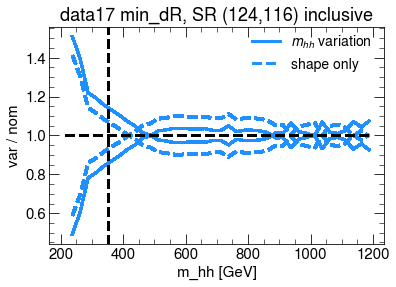

In [32]:
for sri,c,norm,norm_vr,l in zip([sr,sr_gt,sr_lt],['dodgerblue','deeppink','darkorange'],
                                [norm_nom,norm_gt,norm_lt],
                                [n_vr_nom,n_vr_gt,n_vr_lt],
                                ['inclusive','m_hh > 350','m_hh < 350']):

    
    plt.figure()
    nom,e = np.histogram(sr.loc[sr.ntag==2,'m_hh'],n,r,
                         weights=norm*sri.loc[sr.ntag==2,f'NN_d24_weight_bstrap_med_{yr}'])
    var,_ = np.histogram(sr.loc[sr.ntag==2,'m_hh'],n,r,
                         weights=norm_vr*sri.loc[sr.ntag==2,f'NN_d24_weight_VRderiv_bstrap_med_{yr}'])

    xx = 0.5 * (e[1:]+e[:-1])
    
    print(np.sum(nom),np.sum(var))
    
    plt.plot(xx, var/nom, color=c,label='$m_{hh}$ variation'  )
    plt.plot(xx, 2-var/nom, color=c)
    
    # And now shape only
    var *= np.sum(nom) / np.sum(var)
    
    plt.plot(xx, var/nom, color=c,label='shape only',ls='--')
    plt.plot(xx, 2-var/nom, color=c,ls='--')
    
    # Finally, for the nominal training, compare if we would *separately* normalize the low and high pieces
    
    if l == 'inclusive':
        var *= np.sum(nom) / np.sum(var)
    elif l == 'm_hh > 350':
        var *= np.sum(nom[6:]) / np.sum(var[6:])
    elif l == 'm_hh < 350':
        var *= np.sum(nom[:6]) / np.sum(var[:6])
    else:
        print(f'label {l} not recognized... don\'t know how to norm')
        raise NotImplementedError
        
    plt.plot(xx,np.ones_like(xx),'k--')
    ylim = plt.ylim()
    plt.plot([350]*2,ylim,'k--')
    plt.ylim(ylim)
    plt.xlabel('m_hh [GeV]')
    plt.ylabel('var / nom')
    plt.legend(bbox_to_anchor=(1,1.03))

    plt.title(f'data{yr} min_dR, SR (124,116) {l}')
    #plt.ylim(.5,1.5)

In [1]:
4200.85344538687 /4486.778935584102

0.9362737736130496

In [2]:
4459.784437822904 /4528.994378651959

0.9847184749984929

Ok, so *interesting* that this tends to make the envelope bigger...

**How could this *help* us?**  At the end of the day, we're hoping that this is *less correlated* with the PoI $\mu$.


**Compare the nominal and VR derived background models**

In [ ]:
nom,e = np.histogram(sr.loc[sr.ntag==2,'m_hh'],n,r,
                     weights=norm*sri.loc[sr.ntag==2,f'NN_d24_weight_bstrap_med_{yr}'])
    

**Let's gain some more intuition now...** Do a *fit* for the $m_{hh}$ > 350 GeV model w/ 3 params:
1. PoI
2. Shape
3. Norm

And then *also* take a look at the *pulls* and *correlations*

In [111]:
def makeWS_2NP(s,b,a):
    '''
    Super simple fct to make a ws from the 3 histograms, and then
    - s: signal
    - b: background
    - a: alternative bkg model 
    
    The likelihood will then be described by:
    1. Signal strength mu (PoI)
    2. Bkg shape variation 
    3. Bkg norm variation
    
    '''    
   
    si = { 'name': 'sig', 
           'data': list(s),
           'modifiers': [{'name': 'mu', 'type': 'normfactor', 'data': None}]} 

    # Background    
    # For the shape syst - normalize the prediction and then make a variation and alternate model
    norm = np.sum(b) / np.sum(a)
    var = norm*a 
    
    print(np.sum(b),np.sum(2*b - var),np.sum(var))
    
    db = abs(np.sum(b) - np.sum(a))/np.sum(b)
    
    bmods = [
                {                 
                 'name': f'shape{yr}',
                 'type': 'histosys',
                 'data': { 'lo_data': list(2*b - var), 
                           'hi_data': list(var) }
                },
                {                 
                 'name': f'norm{yr}',
                 'type': 'normsys',
                 'data': { 'lo': db, 
                           'hi': 2-db }
                },
            ]

    bi = { 'name': 'bkg',
           'data': list(b),
            'modifiers': bmods
         }

    chan = { 'name': f'channel{yr}',
             'samples': [si,bi] }


    # For "observations" - j include the nominal bkg estimate
    obs = {'name': f'channel{yr}',
           'data': list(b)}
        
    # Measurements - here just for 1 poi
    meas_params = [{ "name": "mu", 
                    "bounds": [[-1000, 1000000]], 
                    "inits":[1.0] }]

    specs = {'channels'     : [ chan ],
             'observations' : [ obs ],
             'measurements' : [{'name': 'Measurement', 
                                'config': { 'poi': 'mu', 'parameters': meas_params } 
                               }],
             'version'      : '1.0.0'}
    
    
    return pyhf.Workspace(specs)

In [123]:
db = abs(np.sum(b) - np.sum(a))/np.sum(b)

In [127]:
np.sum(a)/np.sum(b)

1.017615426697763

In [125]:
1+db

1.017615426697763

In [112]:
def makeWS_1NP(s,b,a):
    '''
    Super simple fct to make a ws from the 3 histograms, and then
    - s: signal
    - b: background
    - a: alternative bkg model 
    
    The likelihood will then be described by:
    1. Signal strength mu (PoI)
    2. Bkg shape variation 
    3. Bkg norm variation
    '''    
   
    si = { 'name': 'sig', 
           'data': list(s),
           'modifiers': [{'name': 'mu', 'type': 'normfactor', 'data': None}]} 

    # Background: j one histo sys    
    bmods = [
                {                 
                 'name': f'shape{yr}',
                 'type': 'histosys',
                 'data': { 'lo_data': list(2*b - a), 
                           'hi_data': list(a) }
                },
            ]

    bi = { 'name': 'bkg',
           'data': list(b),
            'modifiers': bmods
         }

    chan = { 'name': f'channel{yr}',
             'samples': [si,bi] }


    # For "observations" - j include the nominal bkg estimate
    obs = {'name': f'channel{yr}',
           'data': list(b)}
        
    # Measurements - here just for 1 poi
    meas_params = [{ "name": "mu", 
                    "bounds": [[-1000, 1000000]], 
                    "inits":[1.0] }]

    specs = {'channels'     : [ chan ],
             'observations' : [ obs ],
             'measurements' : [{'name': 'Measurement', 
                                'config': { 'poi': 'mu', 'parameters': meas_params } 
                               }],
             'version'      : '1.0.0'}
    
    
    return pyhf.Workspace(specs)

In [113]:
ni,ri = 34,(350,1200)

s = np.histogram(sdf.m_hh,ni,ri, weights=sdf.mc_sf)[0]

b = np.histogram(sr.loc[sr.ntag==2,'m_hh'],ni,ri,
                 weights=norm_gt*sr_gt.loc[sr.ntag==2,f'NN_d24_weight_bstrap_med_{yr}'])[0]
a = np.histogram(sr.loc[sr.ntag==2,'m_hh'],ni,ri,
                 weights=n_vr_gt*sr_gt.loc[sr.ntag==2,f'NN_d24_weight_VRderiv_bstrap_med_{yr}'])[0]

ws_gt_350 = makeWS_2NP(s,b,a)

3629.747596742649 3629.7475967426485 3629.7475967426485


**Cool!** Now that I have a workspace, let's do a *fit*!!

In [114]:
m = ws_gt_350.model(
        measurement_name="Measurement",
        modifier_settings={
            "normsys": {"interpcode": "code4"},
            "histosys": {"interpcode": "code4p"},
        },
    )

d = ws_gt_350.data(m)

In [115]:
mu_tests = np.linspace(0, 50)
obs_limit, exp_limits, (poi_tests, tests) = pyhf.infer.intervals.upperlimit(
    d, m, mu_tests, level=0.05, return_results=True
)

print(f"Observed upper limit: {obs_limit:.3f}\n")
for i, n_sigma in enumerate(np.arange(-2, 3)):
    print(
        "Expected Limit{}: {:.3f}".format(
            "" if n_sigma == 0 else f"({n_sigma} σ)", exp_limits[i]
        )
    )

Observed upper limit: 16.554

Expected Limit(-2 σ): 8.903
Expected Limit(-1 σ): 11.937
Expected Limit: 16.554
Expected Limit(1 σ): 23.049
Expected Limit(2 σ): 30.913


In [86]:
inits = m.config.suggested_init()
inits[ m.config.poi_index ] = 0.0

asi_data = m.expected_actualdata(inits)

asi_data

array([615.01989165, 573.05464476, 490.85220533, 383.46706517,
       298.11959426, 235.87333647, 190.21946693, 156.56222802,
       121.07323506, 100.91777512,  81.5107305 ,  68.38451665,
        57.72233825,  43.25712643,  36.6868165 ,  30.95992849,
        24.99570578,  21.54507234,  16.60617225,  13.91076963,
        11.86266956,  10.34169037,   8.95084055,   8.52764287,
         6.07546836,   5.17028143,   4.38569493,   3.9329654 ,
         2.9203958 ,   2.07735936,   1.63476745,   1.34260565,
         1.03007901,   0.75651642])

In [93]:
ws_1NP = makeWS_1NP(s,b,a)

In [101]:
m1 = ws_1NP.model(
        measurement_name="Measurement",
        modifier_settings={
            "normsys": {"interpcode": "code4"},
            "histosys": {"interpcode": "code4p"},
        },
    )

d1 = ws_1NP.data(m1)

In [104]:
obs_limit, exp_limits, (poi_tests, tests) = pyhf.infer.intervals.upperlimit(
    d1, m1, mu_tests, level=0.05, return_results=True
)

print(f"Observed upper limit: {obs_limit:.3f}\n")
for i, n_sigma in enumerate(np.arange(-2, 3)):
    print(
        "Expected Limit{}: {:.3f}".format(
            "" if n_sigma == 0 else f"({n_sigma} σ)", exp_limits[i]
        )
    )

Observed upper limit: 11.208

Expected Limit(-2 σ): 6.003
Expected Limit(-1 σ): 8.060
Expected Limit: 11.208
Expected Limit(1 σ): 15.719
Expected Limit(2 σ): 21.199


OK - this is just *crazy* that this is such a large difference. I must be parametrizing something wrong honestly.

**Digging into TRExFitter code**

Apparanetly there are *two* ways to parametrize this, either symmetrizing first and then normalizing (recommended) or normalizing first and then symmetrizing.

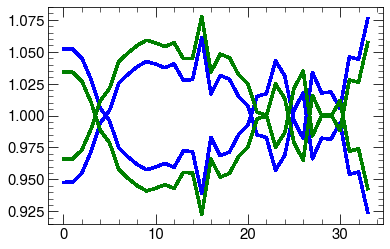

In [120]:
plt.plot((2*b - a)/b,color='b')
plt.plot(a/b,color='b')

norm = np.sum(b)/np.sum(a)
var = norm*a
plt.plot((2*b - var)/b,color='g')
plt.plot(var/b,color='g')



Alright - this is some *good* motivation for why the shape systematic got *worse* with the first thing that I tried lol. 

**Next plan:** Try 

### Bootstrap errors

How does this vary b/w these configurations??